In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn import metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
import pickle

In [3]:
train_data = pd.read_csv("Cleaned_dataset.csv")
train_data.dropna(inplace=True)
train_data.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955


In [4]:
train_data['Journey_day'] = pd.to_datetime(train_data['Date_of_journey'],format='%Y-%m-%d').dt.day
train_data['Journey_month'] = pd.to_datetime(train_data['Date_of_journey'],format='%Y-%m-%d').dt.month

train_data.drop('Date_of_journey',inplace=True,axis=1)

train_data.head()

,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Journey_month
0,16,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335,1
1,16,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899,1
2,16,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801,1
3,16,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794,1
4,16,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955,1


In [5]:
Dep = train_data[['Departure']]
Dep = pd.get_dummies(Dep,drop_first=True)
Dep.head()

,Departure_6 AM - 12 PM,Departure_After 6 PM,Departure_Before 6 AM
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False


In [6]:
train_data['Total_stops'].replace({'non-stop':0,'1-stop':1,'2+-stop':2},inplace=True)
train_data.head()

,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Journey_month
0,16,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,0,After 6 PM,Mumbai,2.0833,1,5335,1
1,16,Indigo,6E-2519,Economy,Delhi,After 6 PM,0,Before 6 AM,Mumbai,2.3333,1,5899,1
2,16,GO FIRST,G8-354,Economy,Delhi,After 6 PM,0,Before 6 AM,Mumbai,2.1667,1,5801,1
3,16,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,0,After 6 PM,Mumbai,2.0833,1,5794,1
4,16,Air India,AI-805,Economy,Delhi,After 6 PM,0,After 6 PM,Mumbai,2.1667,1,5955,1


In [7]:
train_data['Class'].replace({'Economy':0,'Business':1,'Premium Economy':2,'First':3},inplace=True)
train_data.head()

,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Journey_month
0,16,SpiceJet,SG-8169,0,Delhi,After 6 PM,0,After 6 PM,Mumbai,2.0833,1,5335,1
1,16,Indigo,6E-2519,0,Delhi,After 6 PM,0,Before 6 AM,Mumbai,2.3333,1,5899,1
2,16,GO FIRST,G8-354,0,Delhi,After 6 PM,0,Before 6 AM,Mumbai,2.1667,1,5801,1
3,16,SpiceJet,SG-8709,0,Delhi,After 6 PM,0,After 6 PM,Mumbai,2.0833,1,5794,1
4,16,Air India,AI-805,0,Delhi,After 6 PM,0,After 6 PM,Mumbai,2.1667,1,5955,1


In [8]:
Arr = train_data['Arrival']
Arr = pd.get_dummies(Arr,drop_first=True)
Arr.head()

,6 AM - 12 PM,After 6 PM,Before 6 AM
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False


In [9]:
destination = train_data[['Destination']]
destination = pd.get_dummies(destination,drop_first=True)
destination.head()

,Destination_Bangalore,Destination_Chennai,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_Mumbai
0,False,False,False,False,False,True
1,False,False,False,False,False,True
2,False,False,False,False,False,True
3,False,False,False,False,False,True
4,False,False,False,False,False,True


In [10]:
source = train_data[['Source']]
source = pd.get_dummies(source,drop_first=True)
source.head()

,Source_Bangalore,Source_Chennai,Source_Delhi,Source_Hyderabad,Source_Kolkata,Source_Mumbai
0,False,False,True,False,False,False
1,False,False,True,False,False,False
2,False,False,True,False,False,False
3,False,False,True,False,False,False
4,False,False,True,False,False,False


In [11]:
data_train = pd.concat([train_data,Arr,Dep,source,destination],axis=1)
data_train.drop(['Source','Destination','Arrival','Departure'],axis=1,inplace=True)
data_train.head()

,Journey_day,Airline,Flight_code,Class,Total_stops,Duration_in_hours,Days_left,Fare,Journey_month,6 AM - 12 PM,...,Source_Delhi,Source_Hyderabad,Source_Kolkata,Source_Mumbai,Destination_Bangalore,Destination_Chennai,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_Mumbai
0,16,SpiceJet,SG-8169,0,0,2.0833,1,5335,1,False,...,True,False,False,False,False,False,False,False,False,True
1,16,Indigo,6E-2519,0,0,2.3333,1,5899,1,False,...,True,False,False,False,False,False,False,False,False,True
2,16,GO FIRST,G8-354,0,0,2.1667,1,5801,1,False,...,True,False,False,False,False,False,False,False,False,True
3,16,SpiceJet,SG-8709,0,0,2.0833,1,5794,1,False,...,True,False,False,False,False,False,False,False,False,True
4,16,Air India,AI-805,0,0,2.1667,1,5955,1,False,...,True,False,False,False,False,False,False,False,False,True


In [12]:
data_train = data_train.drop(['Airline', 'Flight_code'], axis = 1)

In [13]:
df = data_train
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Fare"])  # Features
y = df["Fare"]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Create regression matrices
import xgboost as xgb
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [15]:
params = {"objective": "reg:squarederror", "tree_method": "hist"}

evals = [(dtest_reg, "validation"), (dtrain_reg, "train")]
n = 4600


model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
   evals=evals,
   verbose_eval=100,
   early_stopping_rounds=100
)

[0]	validation-rmse:15185.10130	train-rmse:15175.06366
[100]	validation-rmse:5935.70723	train-rmse:5878.27608
[200]	validation-rmse:5595.73563	train-rmse:5474.91556
[300]	validation-rmse:5386.93763	train-rmse:5219.31758
[400]	validation-rmse:5250.14266	train-rmse:5037.90366
[500]	validation-rmse:5142.92317	train-rmse:4897.09424
[600]	validation-rmse:5063.45259	train-rmse:4781.07954
[700]	validation-rmse:5004.68463	train-rmse:4688.73951
[800]	validation-rmse:4948.86741	train-rmse:4598.33880
[900]	validation-rmse:4904.07620	train-rmse:4528.35275
[1000]	validation-rmse:4866.89018	train-rmse:4464.90925
[1100]	validation-rmse:4840.87741	train-rmse:4413.48199
[1200]	validation-rmse:4815.09688	train-rmse:4359.48692
[1300]	validation-rmse:4791.34393	train-rmse:4308.08957
[1400]	validation-rmse:4771.06563	train-rmse:4262.53851
[1500]	validation-rmse:4753.58790	train-rmse:4220.49506
[1600]	validation-rmse:4738.79140	train-rmse:4180.57904
[1700]	validation-rmse:4722.16535	train-rmse:4142.87695
[1

In [16]:
# model.fit(X_train,y_train)
y_pred=model.predict(dtest_reg)

In [17]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(" Root Mean Squared Error (RMSE):",627.5058588364545)
print(" r2 :", metrics.r2_score(y_test,y_pred))

 Root Mean Squared Error (RMSE): 627.5058588364545
 r2 : 0.9481087444067985


<Axes: xlabel='Fare'>

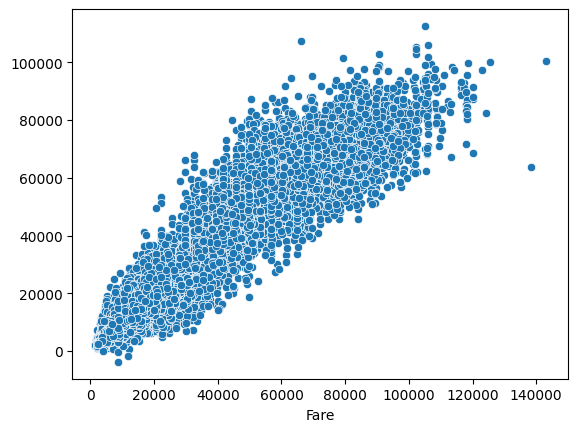

In [18]:
color_dict = {1:'red', 2:'blue'}
sns.scatterplot(x=y_test, y=y_pred)

In [21]:
import joblib
joblib.dump(model, 'flight_pred.pkl')

['flight_pred.pkl']